# NLP: Text Vectorization

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
def get_vectors(*str):
    text = [t for t in str]
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorizer.fit(text)
    my_vectors = tfidf_vectorizer.fit_transform(text).toarray()

    return my_vectors

def get_cosign_sim(received_vectors):
    return cosine_similarity(received_vectors)

In [4]:
# Text List
t1 = "In the past John liked only sports but now he likes sports and politics"
t2 = "Sam only liked politics but he is a fan of both music and international politics"
t3 = "Sara likes both books and politics but in the past she only read books"
t4 = " Robert loved both books and nature but now he only read books"
t5 = "Linda liked music and sport but recently she likes both music and nature"
t6 = "Alison used to love nature"
t7 = "In the past I liked only sports but now I like sports and politics"

In [10]:
vectors = get_vectors(t1, t2, t3, t4, t5, t6, t7)
# vectors

In [11]:
cos_sim = get_cosign_sim(vectors)
cos_sim

array([[1.        , 0.2730409 , 0.37057014, 0.21392791, 0.1774008 ,
        0.        , 0.80832289],
       [0.2730409 , 1.        , 0.21071789, 0.1884278 , 0.30338263,
        0.        , 0.22982002],
       [0.37057014, 0.21071789, 1.        , 0.54640617, 0.2502171 ,
        0.        , 0.33191453],
       [0.21392791, 0.1884278 , 0.54640617, 1.        , 0.17959159,
        0.08347034, 0.16256956],
       [0.1774008 , 0.30338263, 0.2502171 , 0.17959159, 1.        ,
        0.07762715, 0.12819393],
       [0.        , 0.        , 0.        , 0.08347034, 0.07762715,
        1.        , 0.        ],
       [0.80832289, 0.22982002, 0.33191453, 0.16256956, 0.12819393,
        0.        , 1.        ]])

In [12]:
# Reduce dimensions to 2 from 7 to visualize in 2D plots
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 7)

In [13]:
pca = PCA(n_components=2)
cos_sim_pca = pca.fit_transform(cos_sim)
cos_sim_pca

array([[-0.68009957, -0.32352162],
       [ 0.06896457,  0.01920102],
       [-0.17798805,  0.51856725],
       [ 0.1414482 ,  0.59892708],
       [ 0.34872641,  0.1281924 ],
       [ 0.97204284, -0.54226591],
       [-0.6730944 , -0.39910022]])

In [14]:
pca.explained_variance_ratio_

array([0.41556529, 0.24512336])

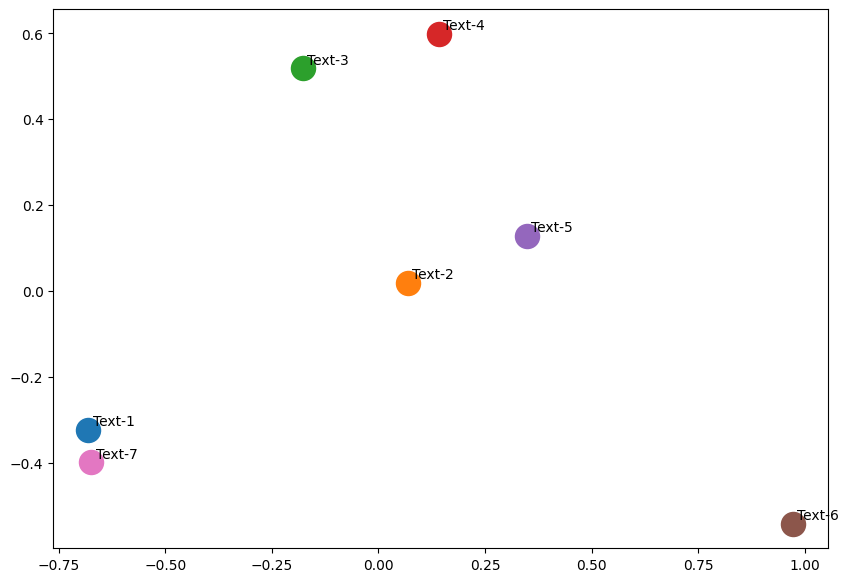

In [15]:
n = cos_sim_pca.shape[0]
labels = []
for i in range(n):
    x = cos_sim_pca[i, 0]
    y = cos_sim_pca[i, 1]
    label = "Text-" + str(i +1)
    plt.scatter(x, y, s=300)
    plt.text(x+0.01, y+0.01, label)

plt.show()